<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Transactions" data-toc-modified-id="Transactions-1">Transactions</a></span></li><li><span><a href="#Business-Summary/tl;dr" data-toc-modified-id="Business-Summary/tl;dr-2">Business Summary/tl;dr</a></span></li><li><span><a href="#EDA-for-transaction_data.csv" data-toc-modified-id="EDA-for-transaction_data.csv-3">EDA for <code>transaction_data.csv</code></a></span><ul class="toc-item"><li><span><a href="#Data-Dictionary-for-transaction_data.csv" data-toc-modified-id="Data-Dictionary-for-transaction_data.csv-3.1">Data Dictionary for <code>transaction_data.csv</code></a></span></li><li><span><a href="#Loyalty-Program" data-toc-modified-id="Loyalty-Program-3.2">Loyalty Program</a></span></li><li><span><a href="#Adding-a-DateTime-column" data-toc-modified-id="Adding-a-DateTime-column-3.3">Adding a DateTime column</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Finding-Christmas" data-toc-modified-id="Finding-Christmas-3.3.0.1">Finding Christmas</a></span></li><li><span><a href="#Weekly-Seasonality" data-toc-modified-id="Weekly-Seasonality-3.3.0.2">Weekly Seasonality</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Finalizing-datetime-Logic" data-toc-modified-id="Finalizing-datetime-Logic-4">Finalizing datetime Logic</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Day-278-is-itself-a-Saturday,-and-643-is-a-Sunday.-Let's-look-up-when-that-combination-occured-in-recent-history:" data-toc-modified-id="Day-278-is-itself-a-Saturday,-and-643-is-a-Sunday.-Let's-look-up-when-that-combination-occured-in-recent-history:-4.0.0.1">Day 278 is itself a Saturday, and 643 is a Sunday. Let's look up when that combination occured in recent history:</a></span></li><li><span><a href="#Adding-Datetime-Information" data-toc-modified-id="Adding-Datetime-Information-4.0.0.2">Adding Datetime Information</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Top-15-Sales-Dates" data-toc-modified-id="Top-15-Sales-Dates-5">Top 15 Sales Dates</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Investigation-and-finalizing-datetime-logic" data-toc-modified-id="Investigation-and-finalizing-datetime-logic-5.0.0.1">Investigation and finalizing datetime logic</a></span></li><li><span><a href="#Adding-hour-and-minute-to-datetime-column" data-toc-modified-id="Adding-hour-and-minute-to-datetime-column-5.0.0.2">Adding hour and minute to datetime column</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Including-transaction-time-in-datetime-column" data-toc-modified-id="Including-transaction-time-in-datetime-column-6">Including transaction time in datetime column</a></span></li><li><span><a href="#Timeseries" data-toc-modified-id="Timeseries-7">Timeseries</a></span></li><li><span><a href="#ACF-and-PACF" data-toc-modified-id="ACF-and-PACF-8">ACF and PACF</a></span></li><li><span><a href="#SARIMAX-Model" data-toc-modified-id="SARIMAX-Model-9">SARIMAX Model</a></span><ul class="toc-item"><li><span><a href="#Optimizing-order-and-seasonal-order" data-toc-modified-id="Optimizing-order-and-seasonal-order-9.1">Optimizing order and seasonal order</a></span></li><li><span><a href="#Train-Test-Split" data-toc-modified-id="Train-Test-Split-9.2">Train Test Split</a></span></li><li><span><a href="#Making-Predictions" data-toc-modified-id="Making-Predictions-9.3">Making Predictions</a></span></li></ul></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-10">Conclusions</a></span></li></ul></div>

# Transactions

Let's take a look at `transaction_data.csv`, where the purchase behaviour is recorded.

# Business Summary/tl;dr


- Placed data in time and space; likely the (north-east) USA from 2004-2006
- Added datetime logic to be added to back-end API
- Noted empty sales rows and leading tail for ETL pipeline 


# EDA for `transaction_data.csv`

In [28]:
#import modules 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (14, 6)
plt.style.use('seaborn')
import seaborn as sns

import datetime
import glob
import my_funcs

In [10]:
# loading transactions and products; forming `merged` dataframe and dropping 0-'QUANTITY' rows

transactions = pd.read_csv('data/transaction_data.csv')

In [11]:
print(transactions.dtypes, transactions.shape)

household_key          int64
BASKET_ID              int64
DAY                    int64
PRODUCT_ID             int64
QUANTITY               int64
SALES_VALUE          float64
STORE_ID               int64
RETAIL_DISC          float64
TRANS_TIME             int64
WEEK_NO                int64
COUPON_DISC          float64
COUPON_MATCH_DISC    float64
dtype: object (2595732, 12)


In [12]:
transactions.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0.0,0.0
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0.0,0.0
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0.0,0.0
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0.0,0.0
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0.0,0.0


In [13]:
transactions.columns

Index(['household_key', 'BASKET_ID', 'DAY', 'PRODUCT_ID', 'QUANTITY',
       'SALES_VALUE', 'STORE_ID', 'RETAIL_DISC', 'TRANS_TIME', 'WEEK_NO',
       'COUPON_DISC', 'COUPON_MATCH_DISC'],
      dtype='object')

## Data Dictionary for `transaction_data.csv`

`household_key` - identifies the household which made the transaction

`BASKET_ID` - identifies the basket in which the transaction occurred

`DAY` - identifies the day of the transaction

`PRODUCT_ID` - identifies the product purchased

`QUANTITY` - identifies the quantity of item purchased

`SALES_VALUE` - identifies the dollars received by the store for the purchase, including manufacturer redemption/rebates

`STORE_ID` - identifies the store where the transaction occurred

`RETAIL_DISC` - identifies the retail (loyalty) discount

`TRANS_TIME` - identifies the hour and minute of the day when the transaction was recorded

`WEEK_NO` - identifies the week of the transaction
 
`COUPON_DISC` - identifies the amount paid by manufacturer to store; used to calculate 'shelf price' paid by customer

`COUPON_MATCH_DISC` - net losses for the company due to coupon/price-matching (presumably listed by other retailers)

In [34]:
# printing dtypes
print(transactions.dtypes)

household_key             int64
BASKET_ID                 int64
DAY                       int64
PRODUCT_ID                int64
QUANTITY                  int64
SALES_VALUE             float64
STORE_ID                  int64
RETAIL_DISC             float64
TRANS_TIME                int64
WEEK_NO                   int64
COUPON_DISC             float64
COUPON_MATCH_DISC       float64
TOTAL_SHELF_PRICE       float64
PER_ITEM_SHELF_PRICE    float64
dtype: object


All values are numeric. 

In [14]:
# checking nulls
transactions.isna().sum()

household_key        0
BASKET_ID            0
DAY                  0
PRODUCT_ID           0
QUANTITY             0
SALES_VALUE          0
STORE_ID             0
RETAIL_DISC          0
TRANS_TIME           0
WEEK_NO              0
COUPON_DISC          0
COUPON_MATCH_DISC    0
dtype: int64

In [15]:
transactions.shape

(2595732, 12)

We have about 2.6 million rows of item-level transactions. The unique identifier for this table is a combination of BASKET_ID and PRODUCT_ID; 

In [17]:
transactions.duplicated().sum()

0

In [ ]:
There are no duplicate rows. 

In [19]:
empty_rows = transactions[(transactions['QUANTITY'] == 0) & (transactions['SALES_VALUE'] == 0)]

empty_rows.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
97,744,26985165432,1,5978648,0,0.0,31582,0.0,1119,1,0.0,0.0
128,1287,26985336468,1,5978648,0,0.0,304,0.0,1351,1,0.0,0.0
249,2305,26996870743,2,5978656,0,0.0,414,0.0,1300,1,-1.0,0.0
293,271,26997082949,2,5978656,0,0.0,329,0.0,1719,1,-2.0,0.0
694,315,27008952267,3,957951,0,0.0,327,0.0,1707,1,0.0,0.0


Around 14400 rows show 0 quantity or sales value. 

In [21]:
empty_rows[['RETAIL_DISC', 'COUPON_DISC', 'COUPON_MATCH_DISC']].sum()

RETAIL_DISC             -1.82
COUPON_DISC         -10328.53
COUPON_MATCH_DISC        0.00
dtype: float64

In [22]:
transactions['COUPON_DISC'].sum()

-42611.54000000002

These rows represent about 1/4 of the total `COUPON_DISC` value of transactions in the table. 

In [23]:
transactions['SALES_VALUE'].sum()

8057463.079999994

Transactions total more than 8 million dollars in revenue. 

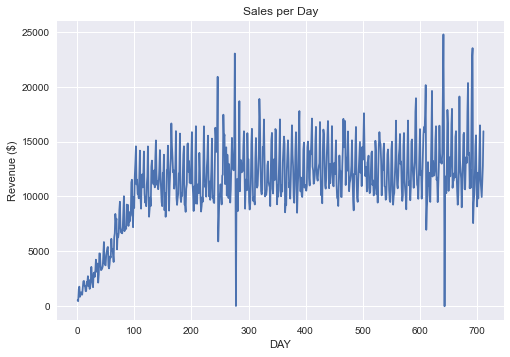

In [27]:
transactions.groupby('DAY')['SALES_VALUE'].sum().plot()
plt.title('Sales per Day')
plt.xlabel('DAY')
plt.ylabel('Revenue ($)')
plt.show()

In [30]:
transactions.groupby('DAY')['SALES_VALUE'].sum().nsmallest(10)

DAY
643       2.99
278      22.49
2       458.91
1       549.31
5       856.93
6      1008.15
9      1050.95
8      1203.85
7      1271.29
15     1371.23
Name: SALES_VALUE, dtype: float64

In [31]:
643-278

365

We find that the two lowest sales days are exactly one year apart. If pressed, we might imagine that this day would be Christmas Day -- when most stores are closed. 

Loyalty Program
---

In [39]:
transactions['RETAIL_DISC'].sum()

-1398334.8400000008

In [38]:
abs(transactions['RETAIL_DISC'].sum()) / transactions['SALES_VALUE'].sum() * 100

17.35452990744578

**Loyalty discounts accounted for $1.4M** in 'lost sales'. This is equivalent to **~17.4\% of our total revenue.**
The task of creating a new loyalty program is a complicated one, and you **risk offending your customers by replacing or reducing an existing loyalty program**.  

The scope of this data (and this project -- and my knowledge in this area!) is insufficient to examine the local competitors for each store or the implications of restructuring the Loyalty Program. However, it is worth noting. 

**Customer attraction/retention on a store level can't be easily examined without context** -- we don't know the location of our stores (and therefore the local markets/competition), nor do we have 'complete' information about all purchases from those stores -- we only have transaction data for the 2500 households which make up this study, not transactions for all customers of the store. We have a **biased sample** group which might not be representative of the underlying population as a whole.  

We should be careful extrapolating and projecting the results onto the store chain as a whole, especially for something as meaningful to brand identity as a loyalty program is. 

Adding a DateTime column
---

#### Finding Christmas

Since I know I want to be examining the effect of direct marketing on customers, having datetime information for the table seems a worthwhile addition -- it will make the data more accessible and valuable.

Let's look at the lowest `SALES_VALUE` per `DAY` on the chart, disregarding the first 120 days (we'll assume there is an issue with data acquisition there).

In [51]:
#print lowest sales days:
print(f"Lowest Sum of SALES_VALUE by Day: \n{transactions[transactions['DAY'] > 120].groupby('DAY')['SALES_VALUE'].sum().nsmallest(20).head(8)}") # find Christmas Day, when stores are closed
print()
print(f"The lowest Sales totals were on days 643 and 278. They were {643-278} days apart.\nThe third and fourth lowest were on days 611 and 247. They were {611-247} days apart.")

Lowest Sum of SALES_VALUE by Day: 
DAY
643       2.99
278      22.49
247    5905.22
611    6962.69
693    7573.73
248    7785.53
155    8147.01
126    8154.52
Name: SALES_VALUE, dtype: float64

The lowest Sales totals were on days 643 and 278. They were 365 days apart.
The third and fourth lowest were on days 611 and 247. They were 364 days apart.


I am going to assume these two lowest points to be Christmas Day, despite not having precisely $0 in sales. 

We see that the third and fourth lowest sales days on the data are almost exactly one year apart -- and offset from by 31 and 32 days, respectively, from their 'Christmas'. I interpret this as likely being American Thanksgiving.

This gives us a solid chance of identifying the real dates from which this data originates, because Christmas falls on a different day of the week each year. Let's try to find the day of the week of those two Christmases.

#### Weekly Seasonality

By looking more closely at the data and leveraging some domain knowledge, we can identify days of the week of our sales data by finding a weekly seasonal pattern.

These highest-grossing days are **Saturdays, the busiest day for grocery shopping**. Using this information, we can extrapolate the days of the week for our two Christmases, and then check which years had that sequence of Christmas weekdates.

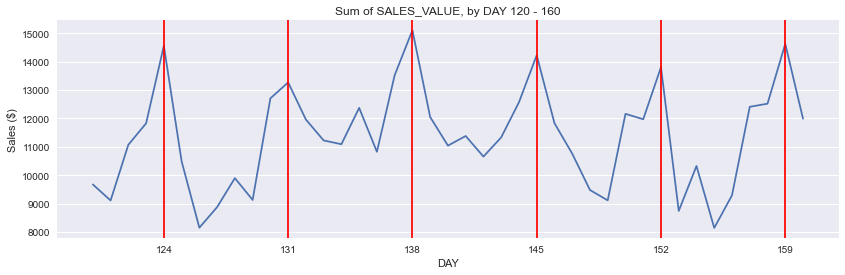

In [52]:
### Using a closer view, we can see the weekly seasonality.
start=120
stop=160

myslice = transactions[transactions['DAY'].between(start, stop)]
plt.figure(figsize=(14,4))
plt.title(f'Sum of SALES_VALUE, by DAY {start} - {stop}')

plt.plot(myslice.groupby('DAY')['SALES_VALUE'].sum())

sats = [124, 131, 138, 145]

for sat in range(sats[0], stop, 7):
    plt.axvline(sat, color='red')

plt.ylabel('Sales ($)')
plt.xlabel('DAY')
plt.xticks(range(sats[0], stop, 7))
plt.show()

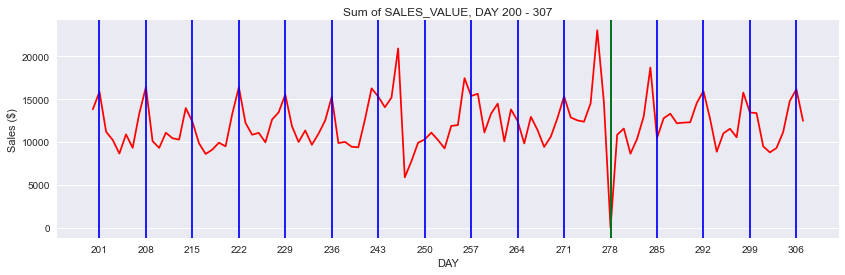

In [53]:
# (CHRISTMAS 1) and extrapolated to find that DAY 278 actually is a Saturday:

plt.figure(figsize=(14,4))
start = 200
stop = 307
myslice = transactions[transactions['DAY'].between(start, stop)]
plt.title(f'Sum of SALES_VALUE, DAY {start} - {stop}')

plt.plot(myslice.groupby('DAY')['SALES_VALUE'].sum(), color='red')

sats = [201]
for sat in range(sats[0], stop, 7):
    plt.axvline(sat, color='blue')
plt.xticks(range(sats[0], stop, 7))

plt.ylabel('Sales ($)')
plt.xlabel('DAY')
plt.axvline(278, color='green')
plt.show();


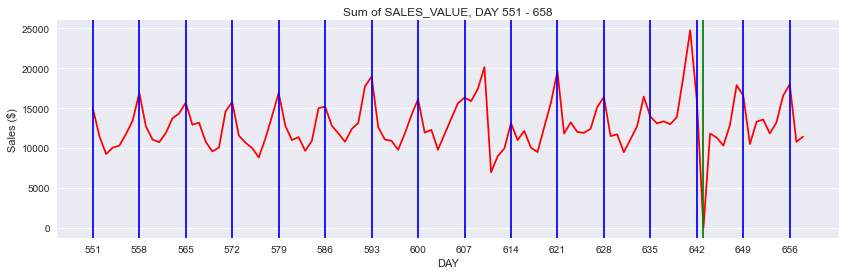

In [54]:
# (CHRISTMAS 2) DAY 643 is a Sunday.  

plt.figure(figsize=(14,4))
start = 551
stop = 658
myslice = transactions[transactions['DAY'].between(start, stop)]
plt.title(f'Sum of SALES_VALUE, DAY {start} - {stop}')

plt.plot(myslice.groupby('DAY')['SALES_VALUE'].sum(), color='red')

sats = [551]
for sat in range(sats[0], stop, 7):
    plt.axvline(sat, color='blue')
plt.xticks(range(sats[0], stop, 7))

plt.ylabel('Sales ($)')
plt.xlabel('DAY')
plt.axvline(643, color='green')
plt.show();

# 643 is a Sunday

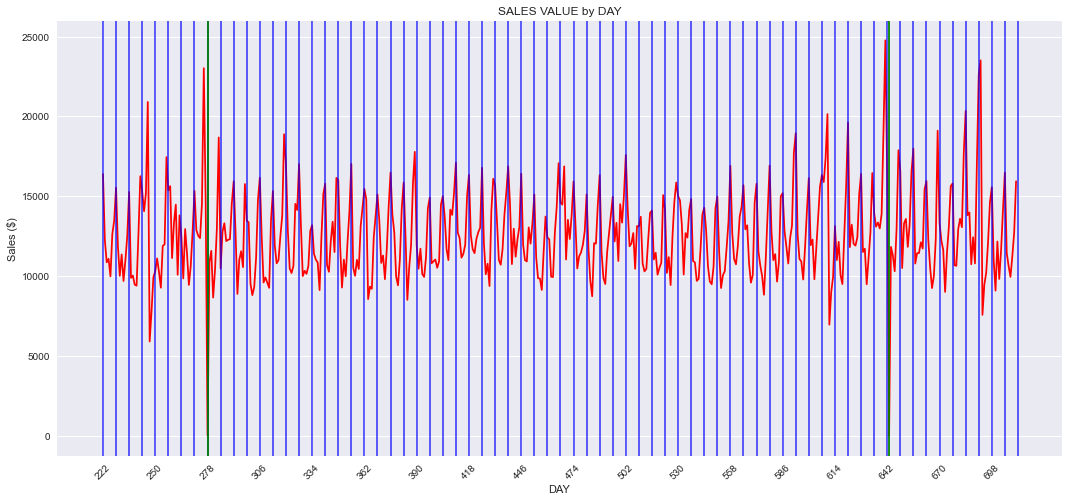

In [55]:
# plot sum of sales by day, identifying christmas and weekly seasonality

start = 222
stop = 713

myslice = transactions[transactions['DAY'].between(start, stop)]

plt.figure(figsize=(18, 8))
plt.title('SALES VALUE by DAY')
plt.ylabel('Sales ($)')
plt.xlabel('DAY')
plt.plot(myslice.groupby('DAY')['SALES_VALUE'].sum(), c='red')
plt.xticks(rotation=45)


for i in range(start, stop, 7):
    plt.axvline(i, c='blue', alpha=0.7)
    
sats=[222]
plt.axvline(278, c='g')
plt.axvline(643, c='g')
plt.xticks(range(sats[0], stop, 28))
plt.show();


# Finalizing datetime Logic

#### Day 278 is itself a Saturday, and 643 is a Sunday. Let's look up when that combination occured in recent history:

[https://www.timeanddate.com/holidays/us/christmas-day#tb-hol_obs](https://www.timeanddate.com/holidays/us/christmas-day#tb-hol_obs)

Christmas fell on a Saturday and then a Sunday twice in the past 20 years; in 2004/2005, and in 2010/2011. Unfortunately (and maybe predictably), American Thanksgiving also lined up exactly. It was on the 25th and then the 24th of November in both of those pairs of years. We'll have to look for more information in the data.

#### Adding Datetime Information

Despite being unsure of the specific year, we can now assign a date(time) range to our data -- at the very least, we know the weekdays will match up.

In terms of finalizing the year, we're down to two possibilities; that's less than what we had before, and that's a good thing. In classic statistics fashion, I flipped a coin. Let's make a start. 

I'm going to create a datetime range which corresponds to the number of days in our data, and put it up alongside the information we do have; first using the year 2004 as a framework.

In [56]:
# extrapolating datetime range from first christmas as DAY 278, year=2004
import datetime


# set year, and first christmas a date
year=2004
christmas1 = datetime.date(year, 12, 25)
# timedelta to day 1
delta = datetime.timedelta(days=277) #278-1

# DAY 1 is christmas minus the delta (1 + 277 = 278)
first = christmas1 - delta
# DAY 711 is (1 + 710)
last = first + datetime.timedelta(710) 
print(f'first: {first}, last: {last}')

# creating range and constructing a map of values for 'DAY' column;
# create a range of datetime objects
myrange = pd.date_range(first, last)
#len(myrange) # 711

# map datetime index to DAY; enumerate() indexes from 0, so we add 1
mymap = {i+1:x for i, x in enumerate(myrange)}

# check the column to add
# transactions['DAY'].map(lambda x: mymap[x])


# check index(day) 278 is still christmas
print(f'Confirming christmas 1 is at DAY 278: {mymap[278]}')
#mymap


# mapping and applying to transactions df...

transactions['datetime'] = transactions['DAY'].map(lambda x: mymap[x])

transactions['datetime']

first: 2004-03-23, last: 2006-03-03
Confirming christmas 1 is at DAY 278: 2004-12-25 00:00:00


0         2004-03-23
1         2004-03-23
2         2004-03-23
3         2004-03-23
4         2004-03-23
             ...    
2595727   2006-03-03
2595728   2006-03-03
2595729   2006-03-03
2595730   2006-03-03
2595731   2006-03-03
Name: datetime, Length: 2595732, dtype: datetime64[ns]

So we have a datetime range spanning from March 23, 2004 to March 3, 2006. 

We can easily go back and check the year to the equivalent dates beginning in 2010, should that be necessary -- the code will require just one change. 

Let's dive a little bit deeper to identify other outlying sales points, and perhaps associate them with world events unique to either 2004-2006, or 2010-2012... I'm thinking Superbowls, Black Friday, etc. -- or maybe we get lucky.

# Top 15 Sales Dates

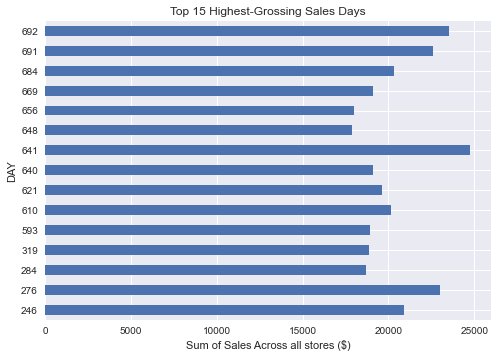

In [57]:
# TOP 15 sales dates in the data, sorted by DAY 
transactions[transactions['DAY'] > 120].groupby('DAY')['SALES_VALUE'].sum().nlargest(15).reset_index().sort_values('DAY').set_index('DAY').plot(kind='barh')
plt.title('Top 15 Highest-Grossing Sales Days')
plt.legend([])
plt.xlabel('Sum of Sales Across all stores ($)')
plt.show()

The top 15 sales dates are listed above, by descending order of DAY.

There were back-to-back high-ranking sales numbers on DAY 691 and 692 -- an anomaly. 

DAY 692 actually had higher sales than the friday before the first 'Christmas'.

What could possibly drive sales up so high as to compete with Christmas?


#### Investigation and finalizing datetime logic

So what happened on DAY 691 and 692?

In [58]:
mymap[691] # Second-Highest sales date, even above First Christmas -- 

Timestamp('2006-02-11 00:00:00', freq='D')

February 11, 2006 is the date, if we are correct about the year.

I searched back through Google.

It turns out **there was a huge storm in the Northeastern US on February 11/12 of 2006** --  As per [https://www.thepeoplehistory.com/february11th.html](https://www.thepeoplehistory.com/february11th.html);

`What has become known as the Blizzard of 2006 started on the evening of the 11th. Heavy snow fell across the northeastern United States from Virginia to Maine through to the evening of the 12th.`

There is no equivalent for those days in 2012, as far as I can tell. 

2006 is a likely bet for the correct year, and moreover gives us an idea of the location of at least some of these stores -- the Northeastern United States. 

Jackpot.

#### Adding hour and minute to datetime column


There's one more thing we need to do to complete the datetime column: add in the transaction time. 

In [59]:
# converting TRANS_TIME to str to find LENGTH of entry; vectorizing the string lengths and counting values:

vec = transactions['TRANS_TIME'].astype('str')

vec2 = pd.Series([len(x) for x in vec]) 
transactions['vec2'] = vec2
vec2.value_counts()

4    2430677
3     147637
2      14038
1       3380
dtype: int64

So, there are `TRANS_TIME` values with up to 4 digits, and much fewer as we approach 0 digits. Seems promising.

Let's look at the length of each entry:

In [60]:
# 00:0X -- 1 digit entries -- unique values
transactions[transactions['vec2']==1]['TRANS_TIME'].unique()
# 0-9 values... one digit of minutes

array([0, 5, 6, 9, 7, 8, 2, 4, 3, 1], dtype=int64)

In [61]:
# 00:XX -- 2 digit entries -- max value
transactions[transactions['vec2']==2]['TRANS_TIME'].unique().max()
# nothing over 59... two digits of minutes

59

In [62]:
# 0X:XX -- 3 digit entries -- number of unique values [1,2,...9 * 60]
# we would expect to see single digit hours with 60 minutes each:
transactions[transactions['vec2']==3]['TRANS_TIME'].nunique()


540

So 3-digit TRANS_TIME had 540 unique values -- exactly 9 hours worth of 3-digit timestamps.

In [63]:
# sum of sales for transactions with 2 or less digits in TRANS_TIME:
transactions[transactions['vec2']<=2]['SALES_VALUE'].sum()


48879.16

In [64]:
transactions[transactions['TRANS_TIME']<100]['SALES_VALUE'].sum()
# all transactions with trans_time less than 100 (1AM.)

48879.16

In order to map the `TRANS_TIME` to datetime effectively, let's fill the empty spaces in the column with 0's, such that we can apply timedelta.

# Including transaction time in datetime column

In [65]:
# define a function to split TRANS_TIME into hour and minute values:
def split_column(row):
    if len(str(row)) ==1:
        hour = "00"
        minute = "0"+str(row)[1:]
    elif len(str(row)) == 2:
        hour = "00"
        minute = str(row)
    elif len(str(row)) ==3:
        hour = "0" + str(row)[0]
        minute = str(row)[-2:]
    elif len(str(row)) ==4:
        hour = str(row)[:2]
        minute = str(row)[2:]
        
    return hour, minute

# split TRANS_TIME and create HOUR and MINUTE vectors; convert to timedelta format;
a = transactions['TRANS_TIME'].apply(split_column)

transactions['HOUR'] = [element[0] for element in a]
transactions['MINUTE'] = [element[1] for element in a]

transactions['HOUR'] = pd.to_timedelta(transactions['HOUR'].astype('int'), unit='hour')
transactions['MINUTE'] = pd.to_timedelta(transactions['MINUTE'].astype('int'), unit='minute')

# broadcast timedelta to the datetime column and drop 'vec2', 'HOUR', 'MINUTE' columns
transactions['datetime'] = transactions['datetime'] + transactions['HOUR'] + transactions['MINUTE']

transactions.drop(['vec2', 'HOUR', 'MINUTE'], axis=1, inplace=True)

transactions['datetime']

0         2004-03-23 16:31:00
1         2004-03-23 16:31:00
2         2004-03-23 16:31:00
3         2004-03-23 16:31:00
4         2004-03-23 16:31:00
                  ...        
2595727   2006-03-03 15:20:00
2595728   2006-03-03 15:20:00
2595729   2006-03-03 15:20:00
2595730   2006-03-03 15:20:00
2595731   2006-03-03 15:20:00
Name: datetime, Length: 2595732, dtype: datetime64[ns]

---

# Timeseries

In [81]:
import statsmodels.api as sm
import itertools

In [73]:
transactions = transactions[transactions['DAY']>111]
# truncate the leading tail

When dealing with timeseries information, we recognize that the `y` (sales) value at time `x`is correlated with the previous time value -- that the points are not independent. 

<AxesSubplot:xlabel='datetime'>

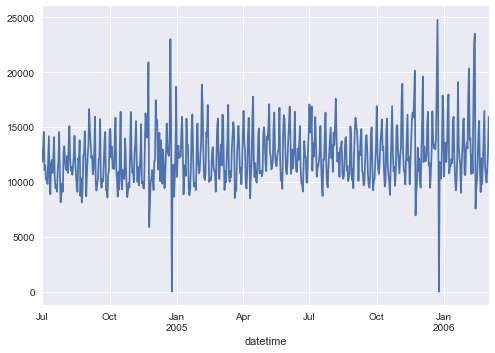

In [72]:
sales_series = transactions.resample('D', on='datetime')['SALES_VALUE'].sum()
sales_series.plot()

Great. This data looks much more **stationary -- making it more usable for performing time-series analysis** although we notice that we've lost our second Christmas in the truncation.

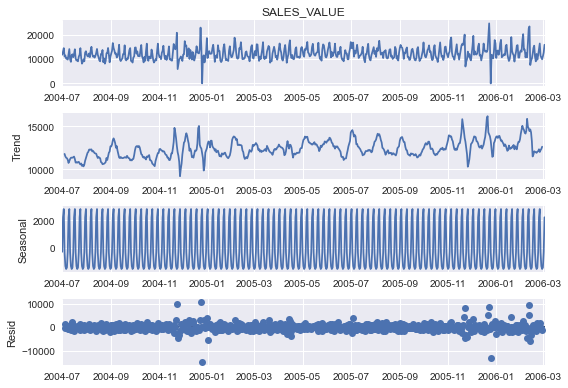

In [74]:
decomposition = sm.tsa.seasonal_decompose(sales_series) #
decomposition.plot()
plt.show()
 

Above, we can see the seasonality of the timeseries; it's trend; and the residuals (or errors). We notice that the christmas/thanksgiving are still anomalous and recognizable, outside of the normal seasonal pattern. 

This makes sense as we used a daily resampling and they are anomalous sales days. These longer-term patterns might be referred to as `cycles`, but I'm not 100% about that.

I'm fascinated with the fast fourier transform, and hope to learn more about it. 
 

In [75]:
len(sales_series) == decomposition.nobs[0]
# the number of observations is given by .nobs

True

In [ ]:
# decomposition.resid
# # the variance NOT explained by seasonality or trend os available as .resid

# decomposition.seasonal.plot()

# decomposition.trend.plot()
# # the trend and seasonality are available as well.

# #Collectively, they return the original timeseries;

# (decomposition.trend + decomposition.seasonal + decomposition.resid).plot()
# sales_series.plot(color='orange', alpha=0.4)
 

# ACF and PACF 

The auto-correlation and partial autocorrelation functions (ACF and PACF) are effectively calculated by performing a .shift() for each of a set number of 'lag' periods in the timeseries, and then calculating the correlation between the current value and the shifted value.

For a timeseries where the x-axis is measured in days, this means that each lag period will be equivalent to one day. The shaded area surrounding the x-axis on the plot (the lag periods) reflects the p-value boundary (0.05) of the correlation; therefore, where the lag value is outside of the shaded area, there is a statistically significant effect. 

Time series "stationarity" is a requirement for this form of analysis; and reflects one of the basic tenets of timeseries: that each successive value will have it's state at least partially derived from the previous state. 

**From the basis of lag 0, where correlation is 1, are there any discernible patterns in the correlation plot, and what might that suggest about our underlying data?**

note: PACF reflects the idea that there is a natural disintegration of correlative effects as a timeseries passes forwards. The correlative impact of longer lag times are neutralized somewhat, which in turn allows for better definition of longterm effects when they are significant; there is less 'noise' from repetitive pattern of lower-lag seasonality, without having to filter them out from your analysis directly.
 

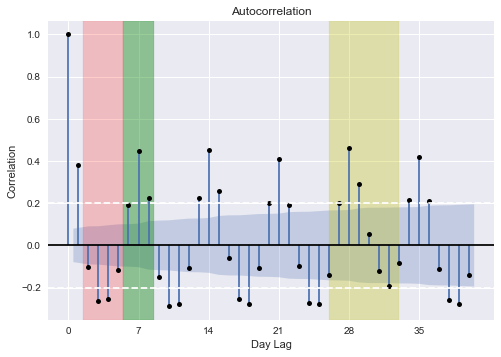

In [101]:
# acf plot
sm.tsa.graphics.plot_acf(sales_series, lags=40, color='black')
plt.axhline(0.2, ls='--', color='white')
plt.axhline(-0.2, ls='--', color='white')


plt.axvspan(1.5,5.5, color='red', alpha=0.2)
plt.axvspan(5.5,8.5, color='green', alpha=0.4)
plt.axvspan(26,33, color='y', alpha=0.3)
plt.xticks(range(0, 41, 7))

plt.ylabel('Correlation')
plt.xlabel('Day Lag')
plt.xticks(range(0, 41, 7))
plt.show()
# we can see the correlation between sales on a given day (0), and sales for days with a given 'lag'; 
# there appears to be a repeating 7-day pattern (weekly seasonality)
 

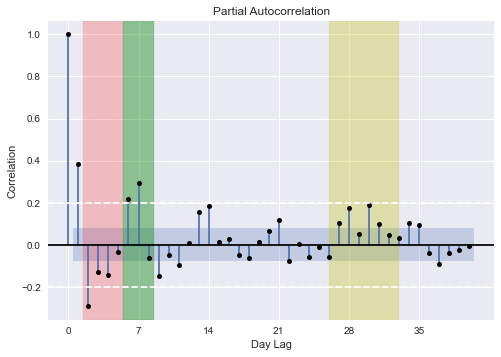

In [100]:
# pacf plot; reducing the signal over time (Recent events are more relevant) 
fig = sm.tsa.graphics.plot_pacf(sales_series, lags=40, color='black')
# in this partial auto-correlation plot we diminish the correlation value, the further we get from day 0. 
plt.axhline(0.2, ls='--', color='white')
plt.axhline(-0.2, ls='--', color='white')


plt.axvspan(1.5,5.5, color='red', alpha=0.2)
plt.axvspan(5.5,8.5, color='green', alpha=0.4)
plt.axvspan(26,33, color='y', alpha=0.3)
plt.ylabel('Correlation')
plt.xlabel('Day Lag')
plt.xticks(range(0, 41, 7))
plt.show()
# Note that these are the same lag periods. 
 

C:\Users\polan\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


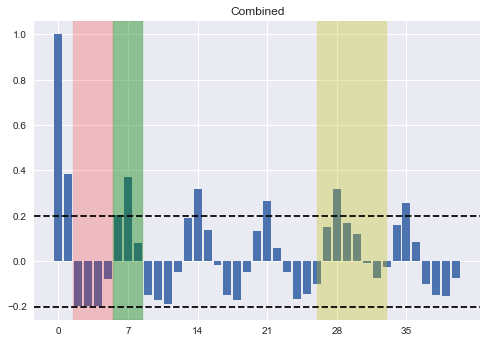

In [96]:
# take the mean of both?
plt.bar(range(0,41), (sm.tsa.pacf(sales_series, nlags=40) + sm.tsa.acf(sales_series, nlags=40))/2) # divide in half
plt.title('Combined')
plt.axhline(0.2, ls='--', color='black')
plt.axhline(-0.2, ls='--', color='black')


plt.axvspan(1.5,5.5, color='red', alpha=0.2)
plt.axvspan(5.5,8.5, color='green', alpha=0.4)
plt.axvspan(26,33, color='y', alpha=0.3)
plt.xticks(range(0, 41, 7))
plt.show()
plt.show()

**There is a 6-7-8 day seasonal effect from the days of the week, and what appears to be a negative 2-3-4 day negative correlation where households generally won't purchase again.**

Interesting to note is the negative 2-day correlation in sales; for any given day when the sales totals were high, the following few days the sales were lower. 


# SARIMAX Model

## Optimizing order and seasonal order


SARIMAX stands for Seasonal Auto Regressive Integrated Moving Average; it seeks to understand the auto-correlation of a timeseries, and extract seasonal and trend patterns in order to examine the residual errors. This allows us to find signals without the interference. 

Below we optimize for p,d,q orders for our SARIMAX model. We can do so using the AIC values for each state-space model.

source: [https://towardsdatascience.com/an-end-to-end-project-on-time-series-analysis-and-forecasting-with-python-4835e6bf050b](https://towardsdatascience.com/an-end-to-end-project-on-time-series-analysis-and-forecasting-with-python-4835e6bf050b)

In [102]:
def test_SARIMAX(sales_series, seasonal_window=7):
    
    
    # set pdq order range
    p = d = q = range(0, 2) 
    
    # make combos
    pdq = list(itertools.product(p, d, q))
    
    ### seasonal PDQM values
    seasonal_pdq = [(x[0], x[1], x[2], seasonal_window) for x in list(itertools.product(p, d, q))]

    # container for lowest AIC score
    lowest = (0, 0, 999999999999)

    # iterate through pdq values up to order 2
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            
            #
            model = sm.tsa.statespace.SARIMAX(sales_series,
                                                order=param,
                                                seasonal_order=param_seasonal)
            results = model.fit()
    #         print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            if results.aic < lowest[2]:
                print(f'SARIMA{param}x{param_seasonal} - AIC:{results.aic} -- lowest:{lowest}')

                lowest = (param, param_seasonal, results.aic)
    #         except:
    #             continue

    return lowest

In [103]:
test_SARIMAX(sales_series)

SARIMA(0, 0, 0)x(0, 0, 0, 7) - AIC:13280.40271341865 -- lowest:(0, 0, 999999999999)
SARIMA(0, 0, 0)x(0, 0, 1, 7) - AIC:12684.27748538635 -- lowest:((0, 0, 0), (0, 0, 0, 7), 13280.40271341865)
SARIMA(0, 0, 0)x(0, 1, 0, 7) - AIC:11281.554074495098 -- lowest:((0, 0, 0), (0, 0, 1, 7), 12684.27748538635)
SARIMA(0, 0, 0)x(0, 1, 1, 7) - AIC:10987.557322235287 -- lowest:((0, 0, 0), (0, 1, 0, 7), 11281.554074495098)
SARIMA(0, 0, 1)x(0, 1, 1, 7) - AIC:10919.718453041472 -- lowest:((0, 0, 0), (0, 1, 1, 7), 10987.557322235287)


C:\Users\polan\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\polan\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMA(1, 1, 1)x(0, 1, 1, 7) - AIC:10882.260374230787 -- lowest:((0, 0, 1), (0, 1, 1, 7), 10919.718453041472)
SARIMA(1, 1, 1)x(1, 1, 1, 7) - AIC:10882.099969810828 -- lowest:((1, 1, 1), (0, 1, 1, 7), 10882.260374230787)


((1, 1, 1), (1, 1, 1, 7), 10882.099969810828)

## Train Test Split

To train a timeseries-based model, we must reserve the later data for our test set. This is because our data points are not independent -- each value depends on the preceding value. 

One option in this field is to gradually increase the size of our training data, starting from the beginning -- and to test on some number of values which directly follow. Gradually we can take more and more data points in our training, until we reach the extent of our data. This prevents data contamination caused by deriving testing results from all our data at once. 



In [104]:
train = sales_series[:-40]
test = sales_series[-40:] # save the last 40 values for testing.

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2825      0.023     12.480      0.000       0.238       0.327
ma.L1         -1.0000      0.021    -46.723      0.000      -1.042      -0.958
ar.S.L7        0.0414      0.042      0.988      0.323      -0.041       0.124
ma.S.L7       -0.9371      0.024    -39.309      0.000      -0.984      -0.890
sigma2      3.524e+06   6.07e-09    5.8e+14      0.000    3.52e+06    3.52e+06


C:\Users\polan\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


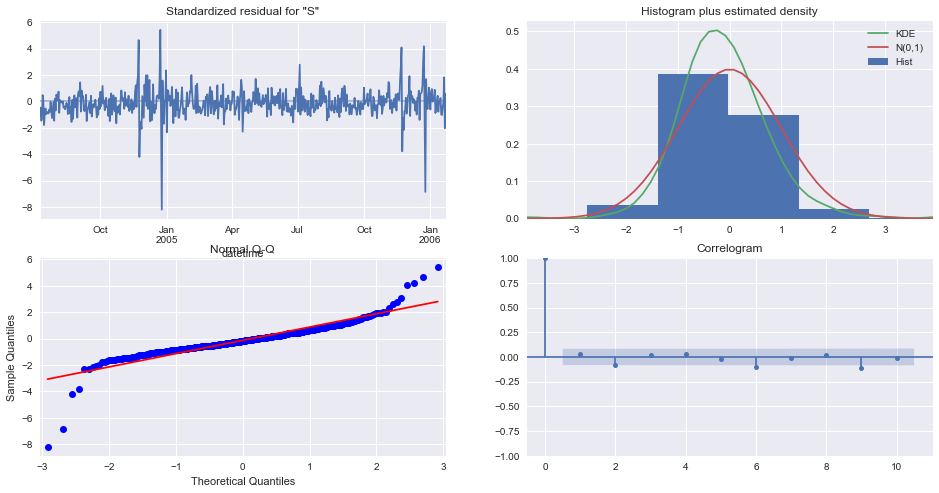

In [105]:
# instantiate
model = sm.tsa.statespace.SARIMAX(train,
                          order=(1, 1, 1),
                seasonal_order=(1, 1, 1, 7),) # use the optimized parameters

# fit
results = model.fit()
# score
print(results.summary().tables[1])

results.plot_diagnostics(figsize=(16, 8))
plt.show()

We've trained this state-space model on the beginning of our timeseries, hoping to predict the values near the end. By optimizing the seasonality/lag parameters (above), we can extract the seasonal effects from our predictions. We can see that by using this model, we've reduced the seasonal pattern to within a reasonable probability distribution.

## Making Predictions

Below we display our SARIMAX model predictions.

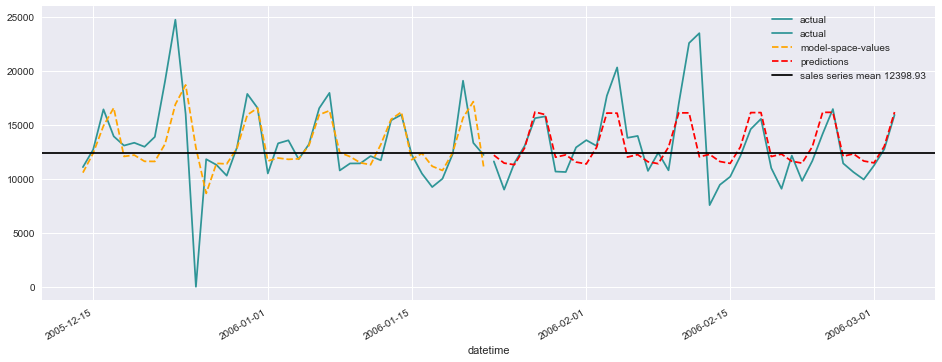

In [112]:
plt.figure(figsize=(16,6))

# plot actual values
plt.plot(test, label='actual', color='teal', alpha=0.8)
plt.plot(train[-40:], label='actual', color='teal', alpha=0.8)
# the next 40 predicted values

# the generated model (space predictions)
results.predict(-40).plot(ls='--', label='model-space-values', color='orange')
plt.plot(results.forecast(40), ls='--', label='predictions', color='red')


# adding mean line
plt.axhline(sales_series.mean(), label=f'sales series mean {round(sales_series.mean(),2)}', color='black')
plt.legend()

In the above plot, we can see Christmas 2005, as well as the storm of February 2006 reflected in our data. Looks pretty good! What's our level of error?

In [113]:
results.mae 

1358.889527885583

In [114]:
(results.mae/11390) *100 ## 11390 is the mean of the series

11.930548971778604

In [115]:
np.std(sales_series)

2618.6293450225116

# Conclusions

This model has a mean average error of more than 10% of the total sales value per day, which poses significant monetary risk. 

However, this \$1300 is only about half of one standard deviation from the sales_series mean (of the data we have...), which is pretty impressive, all things considered. 